## User Engagement analysis

#### importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

#### read cleaned csv data

In [4]:
try:
    clean_data = pd.read_csv('../data/clean_data.csv')
except BaseException:
    logging.error('either file not found or wrong format')
    
print(clean_data.shape)
clean_data = clean_data.dropna()
clean_data.info()

(150001, 45)
<class 'pandas.core.frame.DataFrame'>
Index: 120739 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       120739 non-null  float64
 1   Start                           120739 non-null  object 
 2   Start ms                        120739 non-null  float64
 3   End                             120739 non-null  object 
 4   End ms                          120739 non-null  float64
 5   Dur. (ms)                       120739 non-null  float64
 6   IMSI                            120739 non-null  float64
 7   MSISDN/Number                   120739 non-null  float64
 8   IMEI                            120739 non-null  float64
 9   Last Location Name              120739 non-null  object 
 10  Avg RTT DL (ms)                 120739 non-null  float64
 11  Avg RTT UL (ms)                 120739 non-null  float64
 12  Avg Bear

#### Calculate the number of sessions per user

In [11]:
session_frequency = clean_data.groupby('MSISDN/Number')['Dur. (ms)'].count().reset_index()
session_frequency.columns = ['MSISDN/Number', 'Sessions Frequency']

#### Calculate the total session duration per user

In [12]:
session_duration = clean_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

# Convert duration to seconds for better readability
session_duration['Total Session Duration (s)'] = session_duration['Total Session Duration (ms)'] / 1000


#### Calculate the total traffic (download and upload) per user

In [13]:
total_traffic = clean_data.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()
total_traffic['Total Traffic (Bytes)'] = total_traffic['Total DL (Bytes)'] + total_traffic['Total UL (Bytes)']



#### Merge the calculated metrics into a single DataFrame based on the user's MSISDN/Number

In [15]:
engagement_metrics = pd.merge(session_frequency, session_duration, on='MSISDN/Number')
engagement_metrics = pd.merge(engagement_metrics, total_traffic[['MSISDN/Number', 'Total Traffic (Bytes)']], on='MSISDN/Number')


#### Now, engagement_metrics DataFrame contains the calculated engagement metrics.

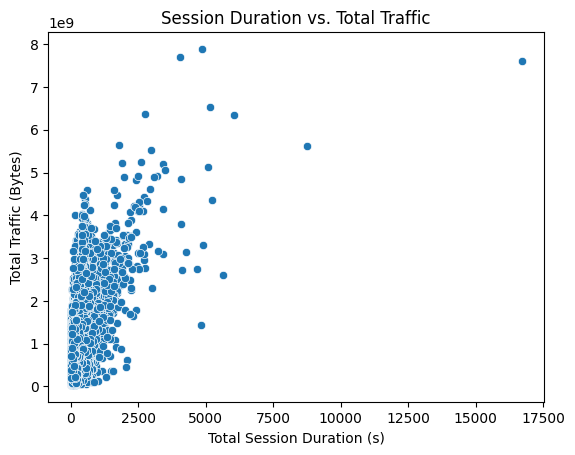

In [16]:
sns.scatterplot(x='Total Session Duration (s)', y='Total Traffic (Bytes)', data=engagement_metrics)
plt.title('Session Duration vs. Total Traffic')
plt.xlabel('Total Session Duration (s)')
plt.ylabel('Total Traffic (Bytes)')
plt.show()